# Cleaning of PrepaidTravelCost.xes

In [1]:
import pm4py
import matplotlib.pyplot as plt

In [2]:
# Load the XES file and convert it to a DataFrame
xes_filename = '../datasets/PrepaidTravelCost.xes'
log = pm4py.read_xes(xes_filename)
df = pm4py.convert_to_dataframe(log)

df

parsing log, completed traces ::   0%|          | 0/2099 [00:00<?, ?it/s]

id  org:resource  \
0                       st_step 73555_0  STAFF MEMBER   
1                       st_step 73554_0  STAFF MEMBER   
2                       st_step 73558_0  STAFF MEMBER   
3                       st_step 73559_0  STAFF MEMBER   
4                       st_step 73557_0  STAFF MEMBER   
...                                 ...           ...   
18241                  st_step 186614_0  STAFF MEMBER   
18242                  st_step 186616_0  STAFF MEMBER   
18243                  st_step 186615_0  STAFF MEMBER   
18244  rp_request for payment 186612_15        SYSTEM   
18245  rp_request for payment 186612_16        SYSTEM   

                                           concept:name  \
0                          Permit SUBMITTED by EMPLOYEE   
1                   Permit FINAL_APPROVED by SUPERVISOR   
2             Request For Payment SUBMITTED by EMPLOYEE   
3      Request For Payment FINAL_APPROVED by SUPERVISOR   
4               Request For Payment REJECTED by MISSING   
...                                                 ...   
18241         Request For Payment SUBMITTED by EMPLOYEE   
18242    Request For Payment APPROVED by ADMINISTRATION   
18243  Request For Payment FINAL_APPROVED by SUPERVISOR   
18244                                   Request Payment   
18245                                   Payment Handled   

                 time:timestamp        org:role                 case:Rfp_id  \
0     2017-01-09 14:48:43+00:00        EMPLOYEE   request for payment 73550   
1     2017-01-09 14:48:55+00:00      SUPERVISOR   request for payment 73550   
2     2017-01-12 11:40:27+00:00        EMPLOYEE   request for payment 73550   
3     2017-01-12 11:41:59+00:00      SUPERVISOR   request for payment 73550   
4     2017-01-12 11:53:07+00:00         MISSING   request for payment 73550   
...                         ...             ...                         ...   
18241 2018-12-30 20:16:15+00:00        EMPLOYEE  request for payment 186612   
18242 2018-12-30 20:16:25+00:00  ADMINISTRATION  request for payment 186612   
18243 2019-01-14 15:09:11+00:00      SUPERVISOR  request for payment 186612   
18244 2019-01-15 07:02:45+00:00       UNDEFINED  request for payment 186612   
18245 2019-01-17 17:31:44+00:00       UNDEFINED  request for payment 186612   

      case:Permit travel permit number   case:Task  case:OrganizationalEntity  \
0                              UNKNOWN  task 71977  organizational unit 65463   
1                              UNKNOWN  task 71977  organizational unit 65463   
2                              UNKNOWN  task 71977  organizational unit 65463   
3                              UNKNOWN  task 71977  organizational unit 65463   
4                              UNKNOWN  task 71977  organizational unit 65463   
...                                ...         ...                        ...   
18241                          UNKNOWN     UNKNOWN  organizational unit 65462   
18242                          UNKNOWN     UNKNOWN  organizational unit 65462   
18243                          UNKNOWN     UNKNOWN  organizational unit 65462   
18244                          UNKNOWN     UNKNOWN  organizational unit 65462   
18245                          UNKNOWN     UNKNOWN  organizational unit 65462   

       case:RequestedAmount  ... case:Permit BudgetNumber  \
0                854.579838  ...              budget 6198   
1                854.579838  ...              budget 6198   
2                854.579838  ...              budget 6198   
3                854.579838  ...              budget 6198   
4                854.579838  ...              budget 6198   
...                     ...  ...                      ...   
18241             96.739075  ...                  UNKNOWN   
18242             96.739075  ...                  UNKNOWN   
18243             96.739075  ...                  UNKNOWN   
18244             96.739075  ...                  UNKNOWN   
18245             96.739075  ...                  

In [3]:
# Rename the column
df = df.rename(columns={'case:Rfp_id': 'case:id'})

# Convert the 'case:id' column to string type
df['case:id'] = df['case:id'].astype(str)

In [4]:
# Display the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18246 entries, 0 to 18245
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   id                                18246 non-null  object             
 1   org:resource                      18246 non-null  object             
 2   concept:name                      18246 non-null  object             
 3   time:timestamp                    18246 non-null  datetime64[ns, UTC]
 4   org:role                          18246 non-null  object             
 5   case:id                           18246 non-null  object             
 6   case:Permit travel permit number  18246 non-null  object             
 7   case:Task                         18246 non-null  object             
 8   case:OrganizationalEntity         18246 non-null  object             
 9   case:RequestedAmount              18246 non-null  float64    

In [5]:
# Group by unique ids
unique_cases = df.groupby('case:id').size()

unique_cases

case:id
request for payment 1000      8
request for payment 10043    11
request for payment 10103    10
request for payment 10231     8
request for payment 10234     8
                             ..
request for payment 998       8
request for payment 9986     12
request for payment 9989     12
request for payment 9991     12
request for payment 9993     12
Length: 2099, dtype: int64

In [6]:
# List the columns in the DataFrame
df.columns

Index(['id', 'org:resource', 'concept:name', 'time:timestamp', 'org:role',
       'case:id', 'case:Permit travel permit number', 'case:Task',
       'case:OrganizationalEntity', 'case:RequestedAmount', 'case:Activity',
       'case:Permit TaskNumber', 'case:Permit BudgetNumber',
       'case:Permit ProjectNumber', 'case:Project', 'case:concept:name',
       'case:Permit OrganizationalEntity', 'case:Permit RequestedBudget',
       'case:Cost Type', 'case:Permit id', 'case:Permit ActivityNumber',
       'case:RfpNumber'],
      dtype='object')

In [7]:
# Number of columns in the DataFrame
df.shape[1]

22

In [8]:
# Count NaN values in each column and calculate their percentage
nan_counts = df.isnull().sum()
total_rows = len(df)
nan_percentages = (nan_counts / total_rows) * 100
print("NaN percentage for each column:\n")
print(nan_percentages)

NaN percentage for each column:

id                                  0.0
org:resource                        0.0
concept:name                        0.0
time:timestamp                      0.0
org:role                            0.0
case:id                             0.0
case:Permit travel permit number    0.0
case:Task                           0.0
case:OrganizationalEntity           0.0
case:RequestedAmount                0.0
case:Activity                       0.0
case:Permit TaskNumber              0.0
case:Permit BudgetNumber            0.0
case:Permit ProjectNumber           0.0
case:Project                        0.0
case:concept:name                   0.0
case:Permit OrganizationalEntity    0.0
case:Permit RequestedBudget         0.0
case:Cost Type                      0.0
case:Permit id                      0.0
case:Permit ActivityNumber          0.0
case:RfpNumber                      0.0
dtype: float64


In [9]:
# Count 'UNKNOWN' values in each column of the filtered DataFrame and their percentages
unknown_counts = df.astype(str).apply(lambda col: col.str.count('UNKNOWN').sum())
columns_with_unknown = unknown_counts[unknown_counts > 0]
total_rows = len(df)
unknown_percentages = (columns_with_unknown / total_rows) * 100

print(unknown_percentages)

case:Permit travel permit number     4.861339
case:Task                           37.504110
case:Activity                       37.580840
case:Permit TaskNumber              38.605722
case:Permit BudgetNumber             4.214622
case:Permit ProjectNumber           38.556396
case:Project                         0.432972
case:Permit OrganizationalEntity     4.214622
case:Permit id                       4.214622
case:Permit ActivityNumber          91.910556
case:RfpNumber                       3.091088
dtype: float64


In [ ]:
# Drop columns with lots of 'UNKNOWN' values
filtered_df = df.drop(columns=["case:Permit ActivityNumber"])

filtered_df

id  org:resource  \
0                       st_step 73555_0  STAFF MEMBER   
1                       st_step 73554_0  STAFF MEMBER   
2                       st_step 73558_0  STAFF MEMBER   
3                       st_step 73559_0  STAFF MEMBER   
4                       st_step 73557_0  STAFF MEMBER   
...                                 ...           ...   
18241                  st_step 186614_0  STAFF MEMBER   
18242                  st_step 186616_0  STAFF MEMBER   
18243                  st_step 186615_0  STAFF MEMBER   
18244  rp_request for payment 186612_15        SYSTEM   
18245  rp_request for payment 186612_16        SYSTEM   

                                           concept:name  \
0                          Permit SUBMITTED by EMPLOYEE   
1                   Permit FINAL_APPROVED by SUPERVISOR   
2             Request For Payment SUBMITTED by EMPLOYEE   
3      Request For Payment FINAL_APPROVED by SUPERVISOR   
4               Request For Payment REJECTED by MISSING   
...                                                 ...   
18241         Request For Payment SUBMITTED by EMPLOYEE   
18242    Request For Payment APPROVED by ADMINISTRATION   
18243  Request For Payment FINAL_APPROVED by SUPERVISOR   
18244                                   Request Payment   
18245                                   Payment Handled   

                 time:timestamp        org:role                     case:id  \
0     2017-01-09 14:48:43+00:00        EMPLOYEE   request for payment 73550   
1     2017-01-09 14:48:55+00:00      SUPERVISOR   request for payment 73550   
2     2017-01-12 11:40:27+00:00        EMPLOYEE   request for payment 73550   
3     2017-01-12 11:41:59+00:00      SUPERVISOR   request for payment 73550   
4     2017-01-12 11:53:07+00:00         MISSING   request for payment 73550   
...                         ...             ...                         ...   
18241 2018-12-30 20:16:15+00:00        EMPLOYEE  request for payment 186612   
18242 2018-12-30 20:16:25+00:00  ADMINISTRATION  request for payment 186612   
18243 2019-01-14 15:09:11+00:00      SUPERVISOR  request for payment 186612   
18244 2019-01-15 07:02:45+00:00       UNDEFINED  request for payment 186612   
18245 2019-01-17 17:31:44+00:00       UNDEFINED  request for payment 186612   

      case:Permit travel permit number   case:Task  case:OrganizationalEntity  \
0                              UNKNOWN  task 71977  organizational unit 65463   
1                              UNKNOWN  task 71977  organizational unit 65463   
2                              UNKNOWN  task 71977  organizational unit 65463   
3                              UNKNOWN  task 71977  organizational unit 65463   
4                              UNKNOWN  task 71977  organizational unit 65463   
...                                ...         ...                        ...   
18241                          UNKNOWN     UNKNOWN  organizational unit 65462   
18242                          UNKNOWN     UNKNOWN  organizational unit 65462   
18243                          UNKNOWN     UNKNOWN  organizational unit 65462   
18244                          UNKNOWN     UNKNOWN  organizational unit 65462   
18245                          UNKNOWN     UNKNOWN  organizational unit 65462   

       case:RequestedAmount  ... case:Permit TaskNumber  \
0                854.579838  ...                UNKNOWN   
1                854.579838  ...                UNKNOWN   
2                854.579838  ...                UNKNOWN   
3                854.579838  ...                UNKNOWN   
4                854.579838  ...                UNKNOWN   
...                     ...  ...                    ...   
18241             96.739075  ...                UNKNOWN   
18242             96.739075  ...                UNKNOWN   
18243             96.739075  ...                UNKNOWN   
18244             96.739075  ...                UNKNOWN   
18245             96.739075  ...                UNKNOWN   

      case:P

In [11]:
# Compute variants paths and their durations

variants_df = pm4py.get_variants_paths_duration(
    filtered_df,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

# dataframe with sorting of the variants
variants = variants_df.groupby('@@variant_column').agg({'@@variant_count': 'first'}).reset_index()

# Sorting the DataFrame by '@@variant_count' column in descending order
variants = variants.sort_values(by='@@variant_count', ascending=False).reset_index(drop=True) # This resets the index after sorting. drop=True ensures the old index is not added as a new column.

len(variants)

201

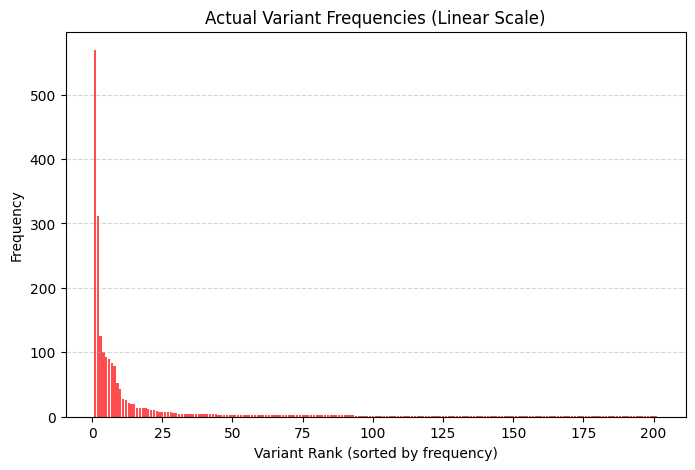

In [12]:
# Create a variable for the distribution 
distribution = variants['@@variant_count']

# Raw Frequency Plot (Linear Scale)
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(distribution)+1), distribution, color='red', alpha=0.7)
plt.title("Actual Variant Frequencies (Linear Scale)")
plt.xlabel("Variant Rank (sorted by frequency)")
plt.ylabel("Frequency")
plt.grid(True, axis='y', ls="--", alpha=0.5)
plt.show()

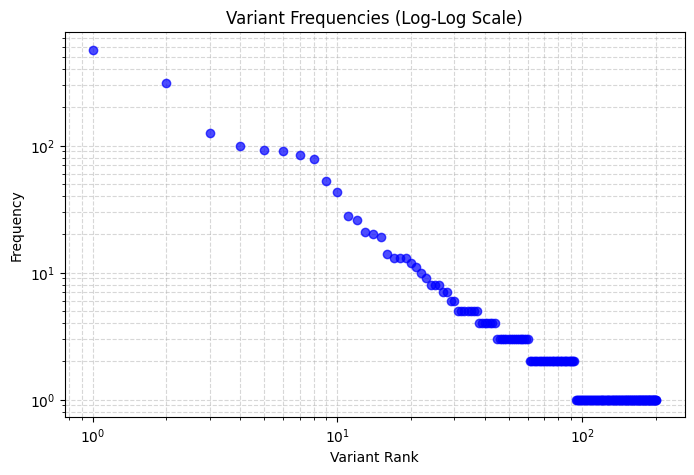

In [13]:
# Log-Log Plot
plt.figure(figsize=(8, 5))
plt.loglog(range(1, len(distribution)+1), distribution, 'bo', alpha=0.7)
plt.title("Variant Frequencies (Log-Log Scale)")
plt.xlabel("Variant Rank")
plt.ylabel("Frequency")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

In [ ]:
# Display the top N variants
top_n = 10
print(top_n, " more frequent variants")
print(variants.head(top_n))

# Evaluate the coverage of the top N variants
total_cases = variants['@@variant_count'].sum()
cases_in_top_n = variants['@@variant_count'].head(top_n).sum()
percentage_coverage = (cases_in_top_n / total_cases) * 100
print(f"\nTop {top_n} variants cover {percentage_coverage:.2f}% of total cases")

10  more frequent variants
                                    @@variant_column  @@variant_count
0  (Permit SUBMITTED by EMPLOYEE, Permit APPROVED...              569
1  (Permit SUBMITTED by EMPLOYEE, Permit APPROVED...              311
2  (Permit SUBMITTED by EMPLOYEE, Permit APPROVED...              126
3  (Permit SUBMITTED by EMPLOYEE, Permit APPROVED...              100
4  (Request For Payment SUBMITTED by EMPLOYEE, Re...               93
5  (Permit SUBMITTED by EMPLOYEE, Permit APPROVED...               90
6  (Request For Payment SUBMITTED by EMPLOYEE, Re...               84
7  (Permit SUBMITTED by EMPLOYEE, Permit FINAL_AP...               79
8  (Permit SUBMITTED by EMPLOYEE, Permit APPROVED...               53
9  (Permit SUBMITTED by EMPLOYEE, Permit APPROVED...               43

Top 10 variants cover 74.00% of total cases


In [15]:
filtered_df = pm4py.filter_variants_top_k(
    filtered_df,
    10,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

filtered_df

id  org:resource  \
31                      st_step 76200_0  STAFF MEMBER   
32                      st_step 76199_0  STAFF MEMBER   
33                      st_step 76202_0  STAFF MEMBER   
34                      st_step 76201_0  STAFF MEMBER   
35      rp_request for payment 76195_15        SYSTEM   
...                                 ...           ...   
18241                  st_step 186614_0  STAFF MEMBER   
18242                  st_step 186616_0  STAFF MEMBER   
18243                  st_step 186615_0  STAFF MEMBER   
18244  rp_request for payment 186612_15        SYSTEM   
18245  rp_request for payment 186612_16        SYSTEM   

                                           concept:name  \
31                         Permit SUBMITTED by EMPLOYEE   
32                  Permit FINAL_APPROVED by SUPERVISOR   
33            Request For Payment SUBMITTED by EMPLOYEE   
34     Request For Payment FINAL_APPROVED by SUPERVISOR   
35                                      Request Payment   
...                                                 ...   
18241         Request For Payment SUBMITTED by EMPLOYEE   
18242    Request For Payment APPROVED by ADMINISTRATION   
18243  Request For Payment FINAL_APPROVED by SUPERVISOR   
18244                                   Request Payment   
18245                                   Payment Handled   

                 time:timestamp        org:role                     case:id  \
31    2017-01-11 12:36:23+00:00        EMPLOYEE   request for payment 76195   
32    2017-01-11 12:36:25+00:00      SUPERVISOR   request for payment 76195   
33    2017-01-17 17:19:43+00:00        EMPLOYEE   request for payment 76195   
34    2017-01-17 17:19:57+00:00      SUPERVISOR   request for payment 76195   
35    2017-01-23 10:27:26+00:00       UNDEFINED   request for payment 76195   
...                         ...             ...                         ...   
18241 2018-12-30 20:16:15+00:00        EMPLOYEE  request for payment 186612   
18242 2018-12-30 20:16:25+00:00  ADMINISTRATION  request for payment 186612   
18243 2019-01-14 15:09:11+00:00      SUPERVISOR  request for payment 186612   
18244 2019-01-15 07:02:45+00:00       UNDEFINED  request for payment 186612   
18245 2019-01-17 17:31:44+00:00       UNDEFINED  request for payment 186612   

      case:Permit travel permit number case:Task  case:OrganizationalEntity  \
31          travel permit number 76194   UNKNOWN  organizational unit 65463   
32          travel permit number 76194   UNKNOWN  organizational unit 65463   
33          travel permit number 76194   UNKNOWN  organizational unit 65463   
34          travel permit number 76194   UNKNOWN  organizational unit 65463   
35          travel permit number 76194   UNKNOWN  organizational unit 65463   
...                                ...       ...                        ...   
18241                          UNKNOWN   UNKNOWN  organizational unit 65462   
18242                          UNKNOWN   UNKNOWN  organizational unit 65462   
18243                          UNKNOWN   UNKNOWN  organizational unit 65462   
18244                          UNKNOWN   UNKNOWN  organizational unit 65462   
18245                          UNKNOWN   UNKNOWN  organizational unit 65462   

       case:RequestedAmount  ... case:Permit TaskNumber  \
31               181.978003  ...                UNKNOWN   
32               181.978003  ...                UNKNOWN   
33               181.978003  ...                UNKNOWN   
34               181.978003  ...                UNKNOWN   
35               181.978003  ...                UNKNOWN   
...                     ...  ...                    ...   
18241             96.739075  ...                UNKNOWN   
18242             96.739075  ...                UNKNOWN   
18243             96.739075  ...                UNKNOWN   
18244             96.739075  ...                UNKNOWN   
18245             96.739075  ...                UNKNOWN   

      case:Permit BudgetNumber case:

In [16]:
# Get original counts
original_rows = len(df)
original_cases = df["case:id"].nunique()

# Get filtered counts
filtered_rows = len(filtered_df)
filtered_cases = filtered_df["case:id"].nunique()

# Calculate the difference
removed_rows = original_rows - filtered_rows
removed_cases = original_cases - filtered_cases

print(f"Original DataFrame: {original_rows} rows, {original_cases} unique case IDs")
print(f"Filtered DataFrame (Top K variants): {filtered_rows} rows, {filtered_cases} unique case IDs")
print(f"\nRemoved: {removed_rows} rows")
print(f"Removed: {removed_cases} unique case IDs")

print(f"\nPercentage of rows removed: {(removed_rows / original_rows) * 100:.2f}%")
print(f"Percentage of cases removed: {(removed_cases / original_cases) * 100:.2f}%")

Original DataFrame: 18246 rows, 2099 unique case IDs
Filtered DataFrame (Top K variants): 12995 rows, 1548 unique case IDs

Removed: 5251 rows
Removed: 551 unique case IDs

Percentage of rows removed: 28.78%
Percentage of cases removed: 26.25%


In [27]:
# Create a temporary column with the variant tuple for each event's case
filtered_df['_temp_variant_tuple'] = filtered_df.sort_values(by='time:timestamp').groupby('case:id')['concept:name'].transform(lambda x: tuple(x))

# Get unique variant tuples and assign them a number
unique_variant_tuples = filtered_df['_temp_variant_tuple'].unique()
variant_to_number = {variant_tuple: i for i, variant_tuple in enumerate(unique_variant_tuples, 1)}

# Map the temporary variant tuple column to the new 'variant_number' column
filtered_df['variant_number'] = filtered_df['_temp_variant_tuple'].map(variant_to_number)

# Drop the temporary column
filtered_df = filtered_df.drop(columns=['_temp_variant_tuple'])

# Display the number of unique variant numbers assigned and their counts
print(f"\nNumber of unique variant numbers assigned: {filtered_df['variant_number'].nunique()}")
print("Counts of each variant number:")
print(filtered_df['variant_number'].value_counts().sort_index())

filtered_df


Number of unique variant numbers assigned: 16
Counts of each variant number:
variant_number
1     1371
2     1145
3     1601
4     1548
5     1548
6     1548
7       90
8       90
9     1202
10     411
11    1379
12     504
13     226
14     226
15      53
16      53
Name: count, dtype: int64


id  org:resource  \
31                      st_step 76200_0  STAFF MEMBER   
32                      st_step 76199_0  STAFF MEMBER   
33                      st_step 76202_0  STAFF MEMBER   
34                      st_step 76201_0  STAFF MEMBER   
35      rp_request for payment 76195_15        SYSTEM   
...                                 ...           ...   
18241                  st_step 186614_0  STAFF MEMBER   
18242                  st_step 186616_0  STAFF MEMBER   
18243                  st_step 186615_0  STAFF MEMBER   
18244  rp_request for payment 186612_15        SYSTEM   
18245  rp_request for payment 186612_16        SYSTEM   

                                           concept:name  \
31                         Permit SUBMITTED by EMPLOYEE   
32                  Permit FINAL_APPROVED by SUPERVISOR   
33            Request For Payment SUBMITTED by EMPLOYEE   
34     Request For Payment FINAL_APPROVED by SUPERVISOR   
35                                      Request Payment   
...                                                 ...   
18241         Request For Payment SUBMITTED by EMPLOYEE   
18242    Request For Payment APPROVED by ADMINISTRATION   
18243  Request For Payment FINAL_APPROVED by SUPERVISOR   
18244                                   Request Payment   
18245                                   Payment Handled   

                 time:timestamp        org:role                     case:id  \
31    2017-01-11 12:36:23+00:00        EMPLOYEE   request for payment 76195   
32    2017-01-11 12:36:25+00:00      SUPERVISOR   request for payment 76195   
33    2017-01-17 17:19:43+00:00        EMPLOYEE   request for payment 76195   
34    2017-01-17 17:19:57+00:00      SUPERVISOR   request for payment 76195   
35    2017-01-23 10:27:26+00:00       UNDEFINED   request for payment 76195   
...                         ...             ...                         ...   
18241 2018-12-30 20:16:15+00:00        EMPLOYEE  request for payment 186612   
18242 2018-12-30 20:16:25+00:00  ADMINISTRATION  request for payment 186612   
18243 2019-01-14 15:09:11+00:00      SUPERVISOR  request for payment 186612   
18244 2019-01-15 07:02:45+00:00       UNDEFINED  request for payment 186612   
18245 2019-01-17 17:31:44+00:00       UNDEFINED  request for payment 186612   

      case:Permit travel permit number case:Task  case:OrganizationalEntity  \
31          travel permit number 76194   UNKNOWN  organizational unit 65463   
32          travel permit number 76194   UNKNOWN  organizational unit 65463   
33          travel permit number 76194   UNKNOWN  organizational unit 65463   
34          travel permit number 76194   UNKNOWN  organizational unit 65463   
35          travel permit number 76194   UNKNOWN  organizational unit 65463   
...                                ...       ...                        ...   
18241                          UNKNOWN   UNKNOWN  organizational unit 65462   
18242                          UNKNOWN   UNKNOWN  organizational unit 65462   
18243                          UNKNOWN   UNKNOWN  organizational unit 65462   
18244                          UNKNOWN   UNKNOWN  organizational unit 65462   
18245                          UNKNOWN   UNKNOWN  organizational unit 65462   

       case:RequestedAmount  ... case:Permit BudgetNumber  \
31               181.978003  ...              budget 4164   
32               181.978003  ...              budget 4164   
33               181.978003  ...              budget 4164   
34               181.978003  ...              budget 4164   
35               181.978003  ...              budget 4164   
...                     ...  ...                      ...   
18241             96.739075  ...                  UNKNOWN   
18242             96.739075  ...                  UNKNOWN   
18243             96.739075  ...                  UNKNOWN   
18244             96.739075  ...                  UNKNOWN   
18245             96.739075  ...                  UNKNOWN   

      case:P

In [18]:
# Add a new DataFrame to store the durations of each case
filtered_df_dur = filtered_df.copy()

# Min and Max Timestamps for Case Durations
min_timestamps = filtered_df_dur.groupby('case:id')['time:timestamp'].min()
max_timestamps = filtered_df_dur.groupby('case:id')['time:timestamp'].max()

# Case Durations as Timedelta and convert to seconds
case_durations_timedelta = max_timestamps - min_timestamps
case_durations_seconds = case_durations_timedelta.dt.total_seconds()

# Mapping, conversion and new columns
filtered_df_dur.loc[:, 'case_duration_seconds'] = filtered_df_dur['case:id'].map(case_durations_seconds)
filtered_df_dur.loc[:, 'case_duration_minutes'] = filtered_df_dur['case_duration_seconds'] / 60
filtered_df_dur.loc[:, 'case_duration_hours'] = filtered_df_dur['case_duration_seconds'] / 3600
filtered_df_dur.loc[:, 'case_duration_days'] = filtered_df_dur['case_duration_seconds'] / (24 * 3600)

# Statistics for case durations
print(f"Mean duration (days): {filtered_df_dur['case_duration_days'].mean():.2f}")
print(f"Median duration (days): {filtered_df_dur['case_duration_days'].median():.2f}")
print(f"Max duration (days): {filtered_df_dur['case_duration_days'].max():.2f}")
print(f"Min duration (days): {filtered_df_dur['case_duration_days'].min():.2f}")
print(f"N° of Nan created: {filtered_df_dur['case_duration_seconds'].isna().sum()}")

Mean duration (days): 38.52
Median duration (days): 26.06
Max duration (days): 324.98
Min duration (days): 2.24
N° of Nan created: 0


In [19]:
# Find the number of cases with zero duration and filter them out
zero_duration_cases_count = (filtered_df_dur['case_duration_seconds'] == 0).sum()

filtered_df_dur = filtered_df_dur[
    filtered_df_dur['case_duration_seconds'] > 0
]

print(f"Number of cases with zero duration (seconds): {zero_duration_cases_count}")

Number of cases with zero duration (seconds): 0


In [20]:
# Get the start activities of the cases

start_activities = pm4py.get_start_activities(
    filtered_df_dur,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

start_activities

{'Permit SUBMITTED by EMPLOYEE': 1371,
 'Request For Payment SUBMITTED by EMPLOYEE': 177}

In [21]:
# Get the end activities of the cases

end_activities = pm4py.get_end_activities(
    filtered_df_dur,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

end_activities

{'Payment Handled': 1548}

In [22]:
# Compute frequency of activities
activity_counts = filtered_df_dur["concept:name"].value_counts().sort_values(ascending=True)
print("Frequency of Activities:\n", activity_counts)

Frequency of Activities:
 concept:name
Request For Payment REJECTED by ADMINISTRATION        53
Request For Payment REJECTED by EMPLOYEE              53
Permit APPROVED by PRE_APPROVER                       90
Request For Payment APPROVED by PRE_APPROVER          90
Permit APPROVED by SUPERVISOR                        226
Permit FINAL_APPROVED by DIRECTOR                    226
Permit APPROVED by BUDGET OWNER                      411
Request For Payment APPROVED by BUDGET OWNER         504
Permit FINAL_APPROVED by SUPERVISOR                 1145
Permit APPROVED by ADMINISTRATION                   1202
Permit SUBMITTED by EMPLOYEE                        1371
Request For Payment APPROVED by ADMINISTRATION      1379
Request For Payment FINAL_APPROVED by SUPERVISOR    1548
Request Payment                                     1548
Payment Handled                                     1548
Request For Payment SUBMITTED by EMPLOYEE           1601
Name: count, dtype: int64


In [ ]:
# Create a copy of the filtered DataFrame for further analysis
df_cleaned = filtered_df_dur.copy()

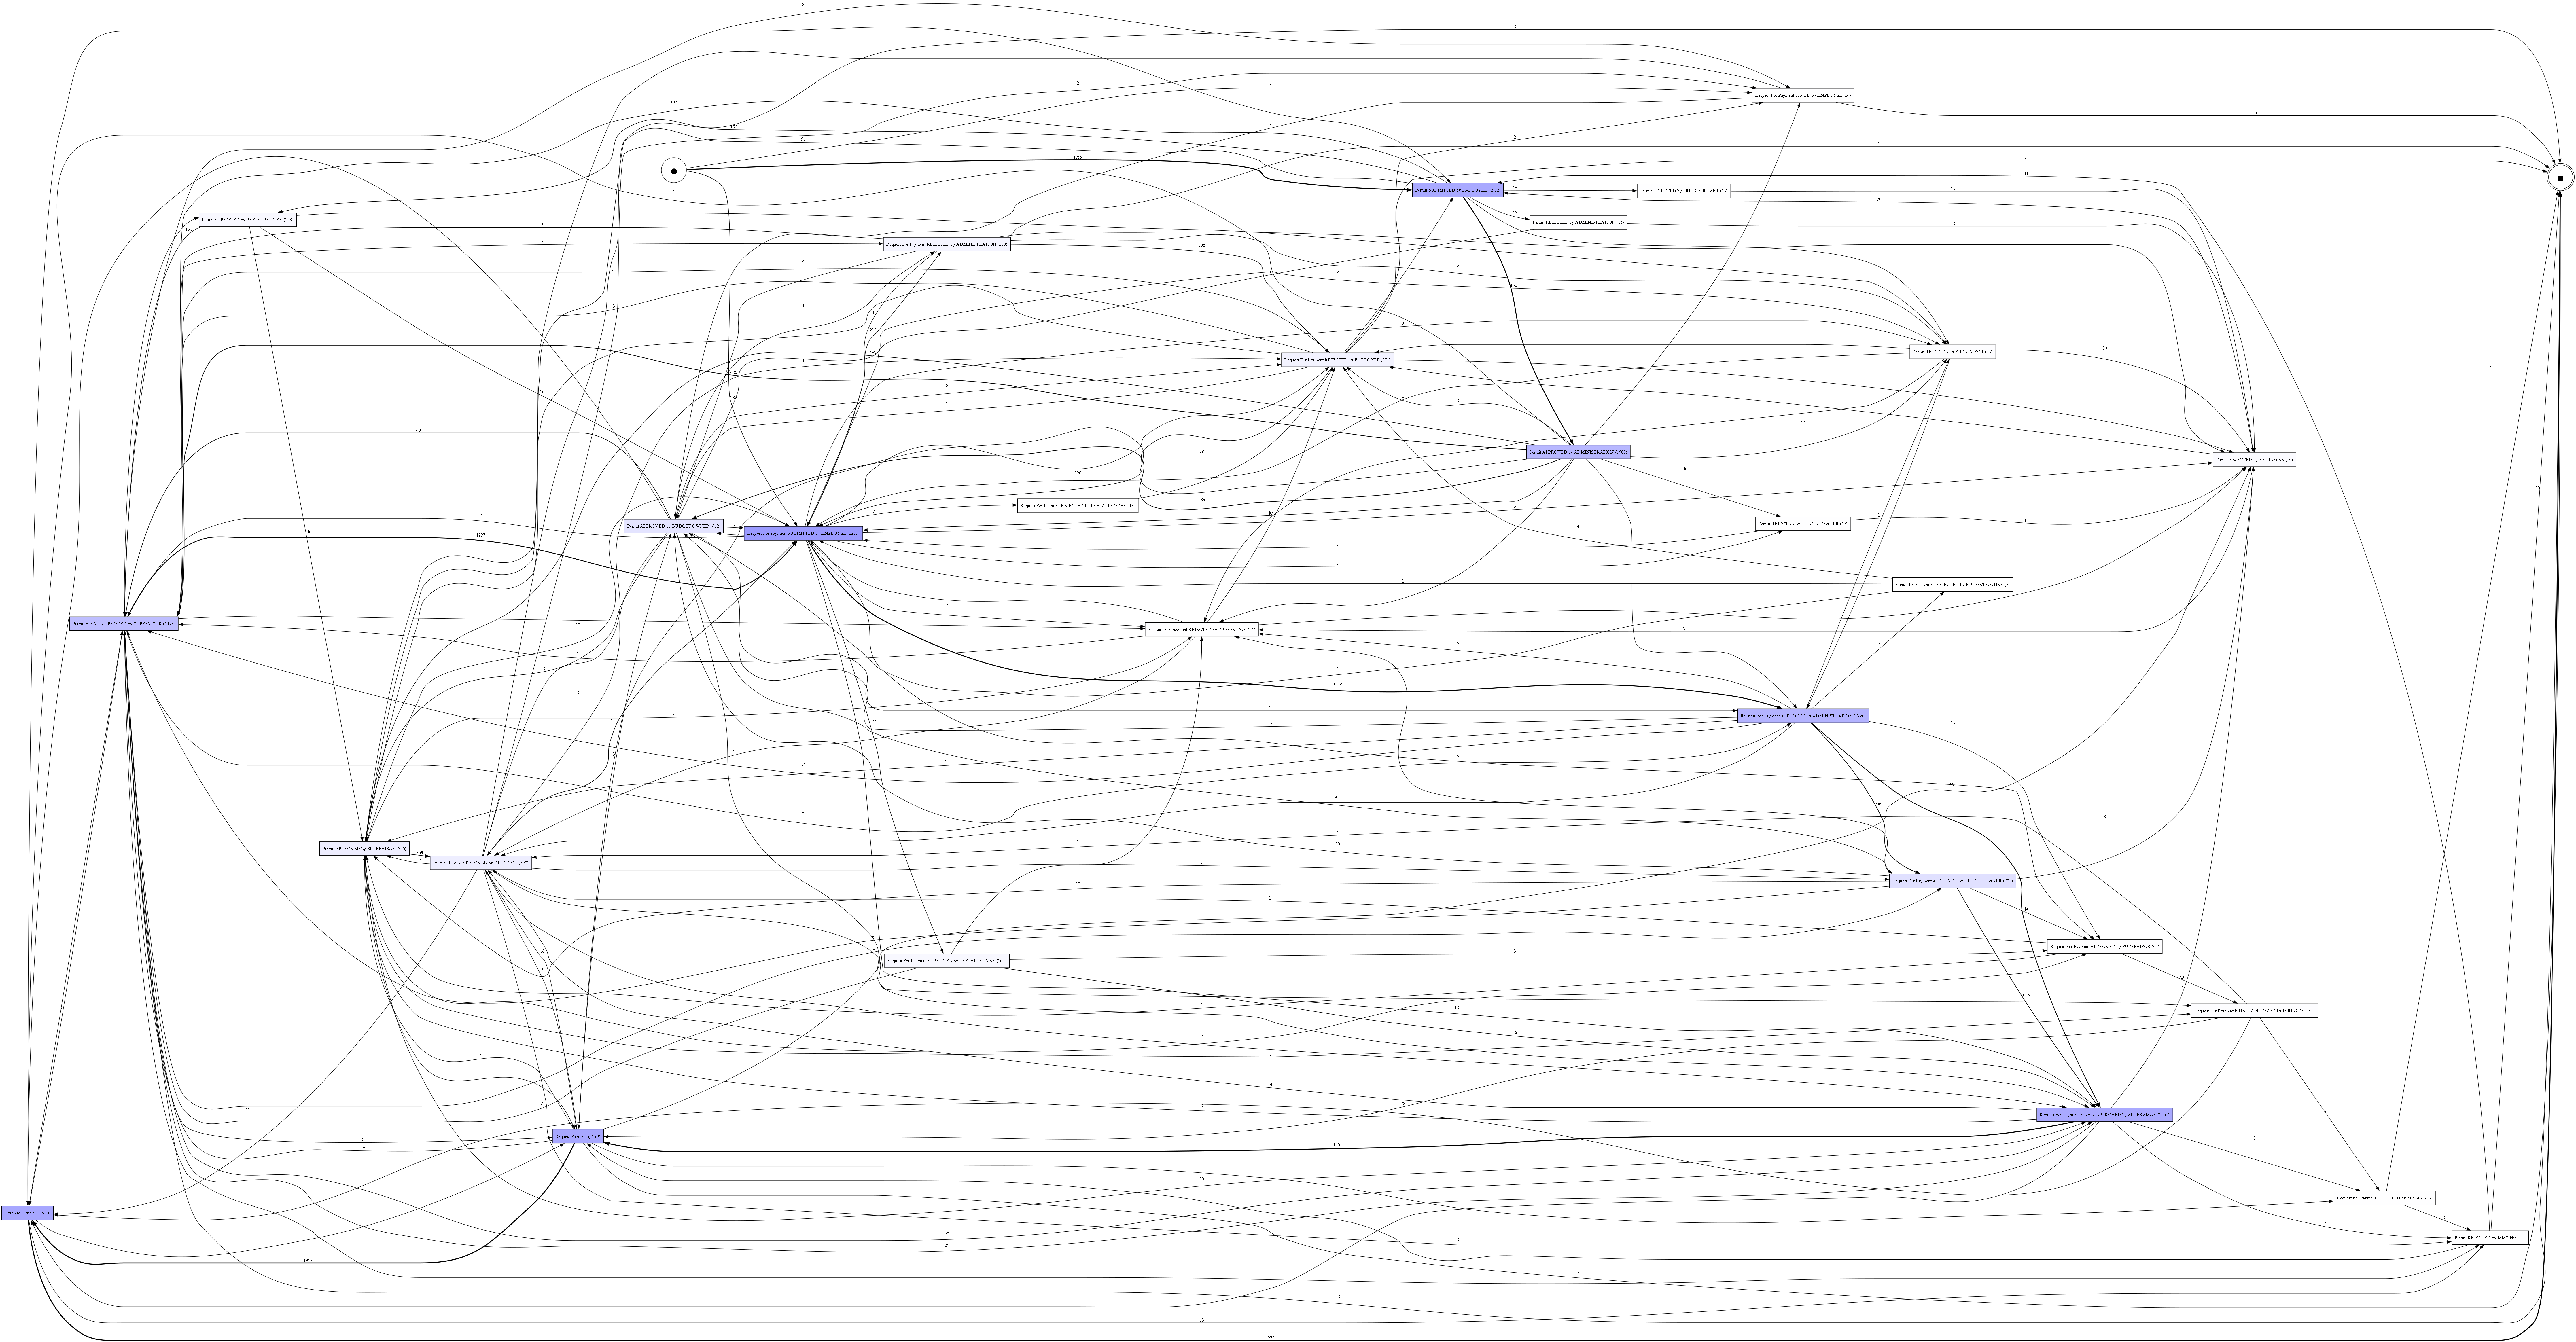

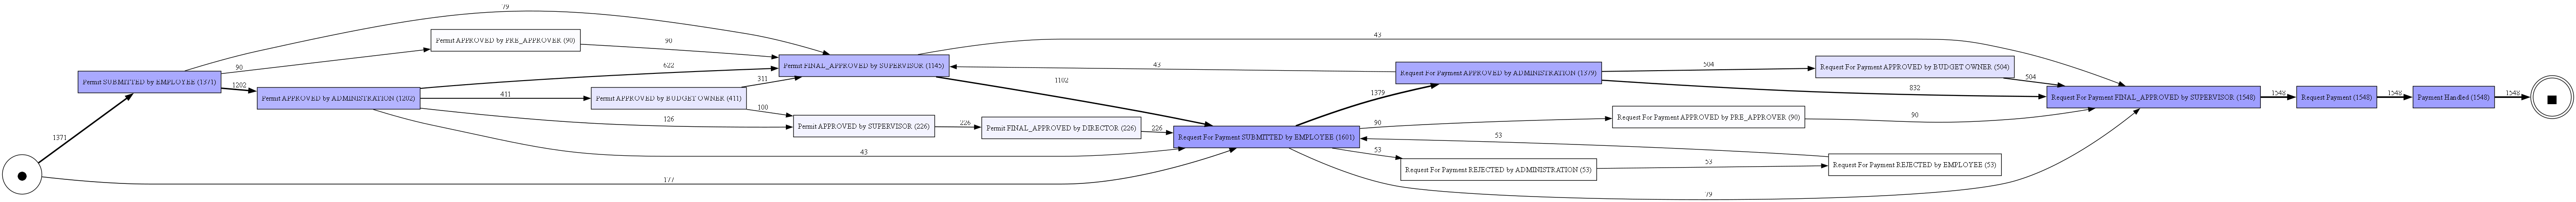

In [ ]:
# Directly Follows Graph (DFG)

# Create graph from original DF and visualise it
dfg, start_activities, end_activities = pm4py.discover_dfg(df)
pm4py.view_dfg(dfg, start_activities, end_activities)

# Create graph from filtered DF and visualise it
dfg, start_activities, end_activities = pm4py.discover_dfg(df_cleaned)
pm4py.view_dfg(dfg, start_activities, end_activities)

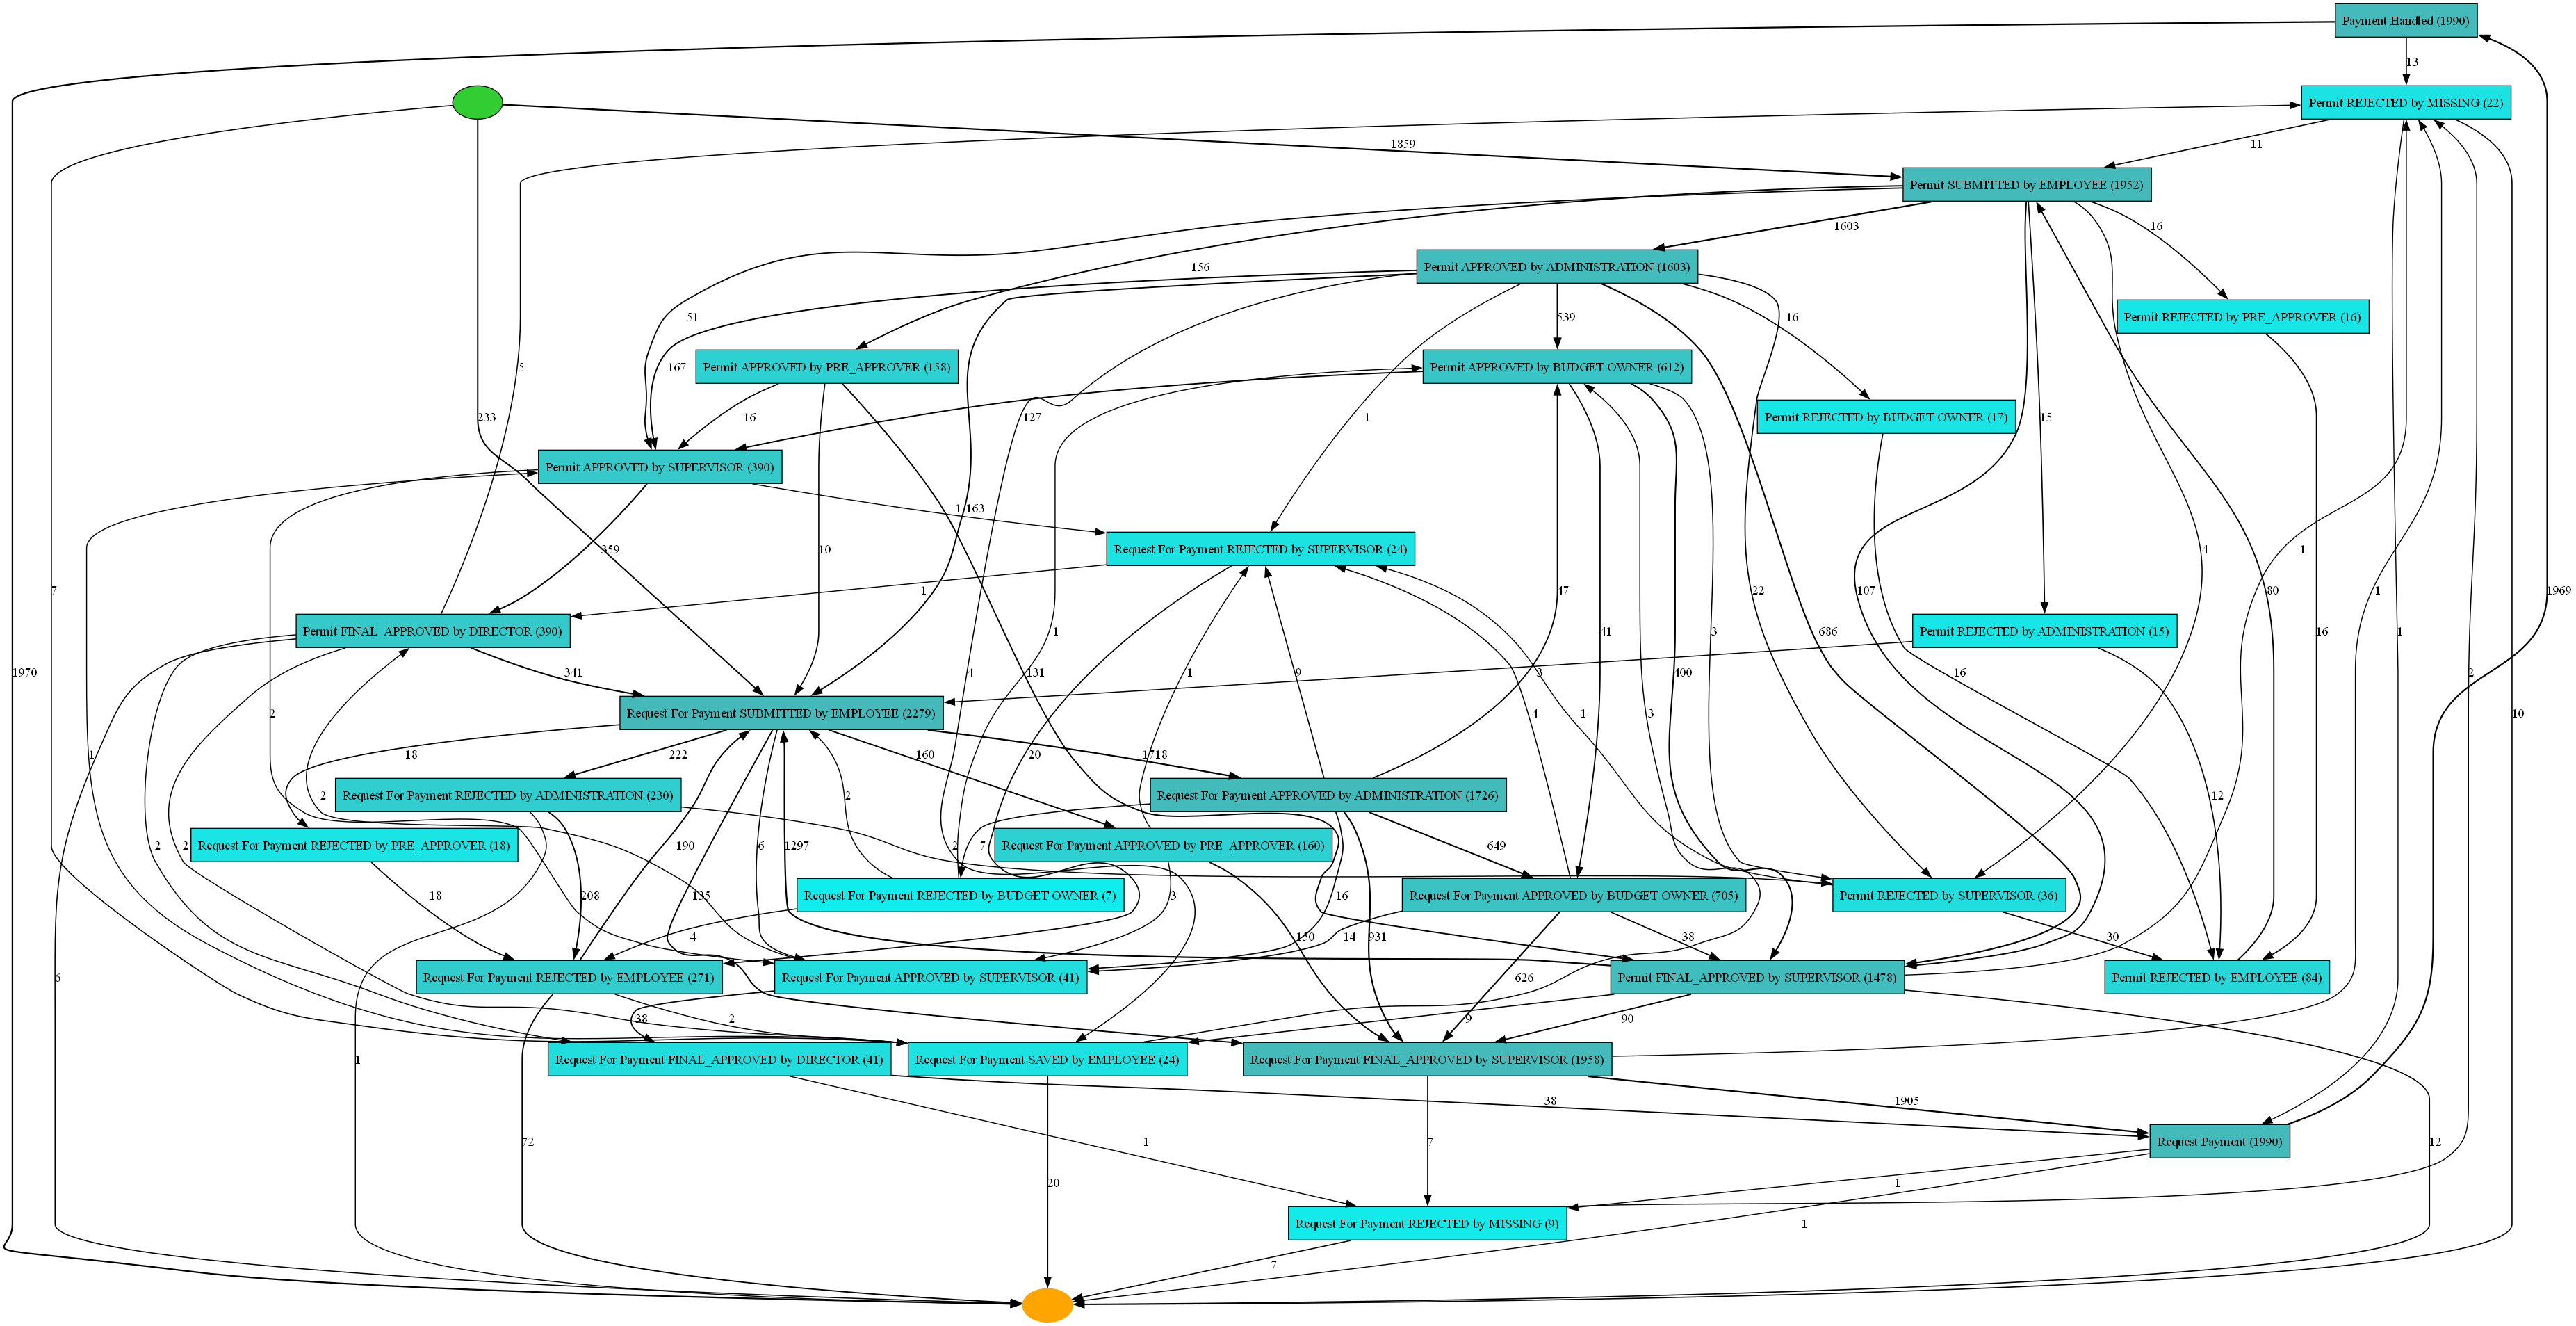

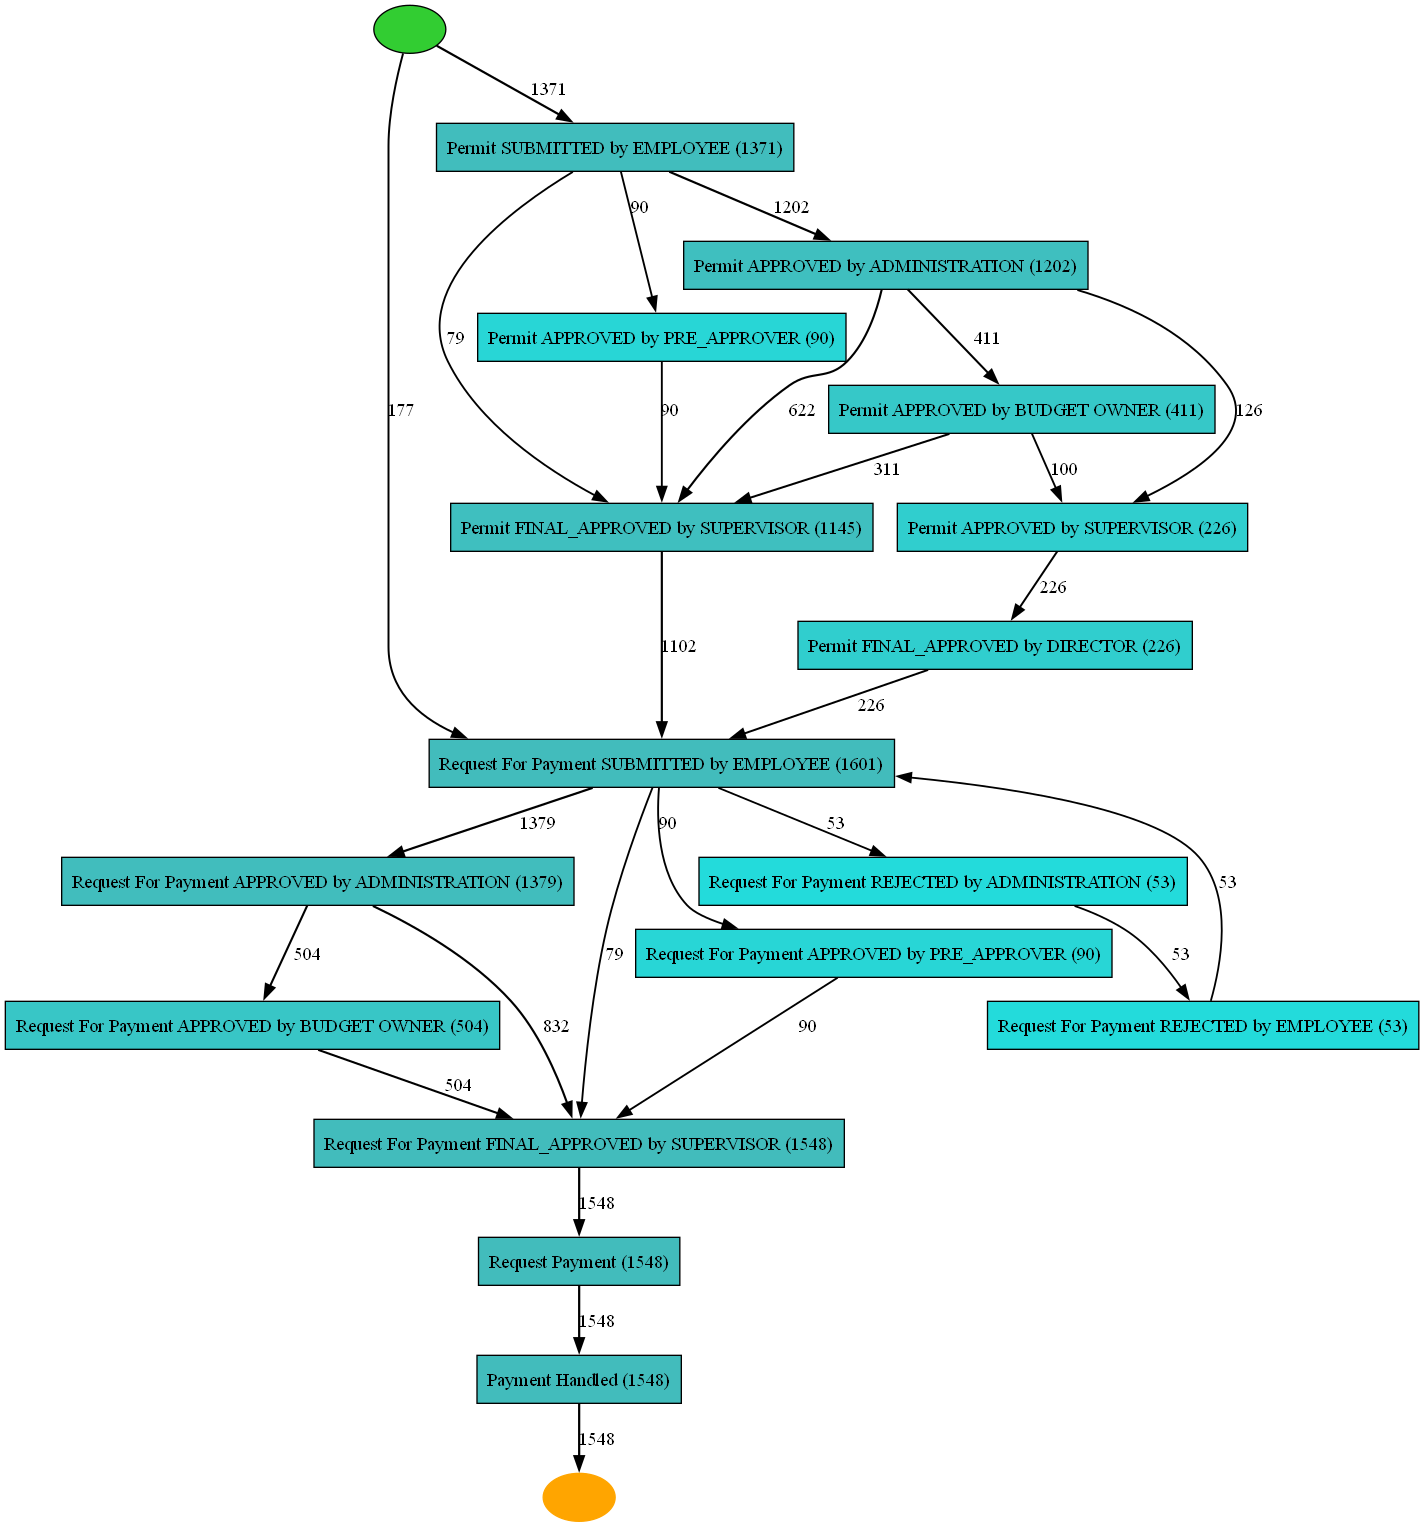

In [ ]:
# Heuristic Miner (HM)

# Discover the HM-map of the original DF and visualise it
map = pm4py.discover_heuristics_net(df)
pm4py.view_heuristics_net(map)

# Discover the HM-map of the filtered DF and visualise it
map = pm4py.discover_heuristics_net(df_cleaned)
pm4py.view_heuristics_net(map)

In [26]:
# Export the cleaned DataFrame to an XES file

"""
log_name_for_file = "PrepaidTravelCost_cleaned.xes"
log = pm4py.convert_to_event_log(df_cleaned,
                                 case_id_key='case:id',
                                 activity_key='concept:name',
                                 timestamp_key='time:timestamp')

pm4py.write_xes(log, log_name_for_file)

print(f"Log succesfully exported in: {log_name_for_file}")
"""

'\nlog_name_for_file = "PrepaidTravelCost_cleaned.xes"\nlog = pm4py.convert_to_event_log(df_cleaned,\n                                 case_id_key=\'case:id\',\n                                 activity_key=\'concept:name\',\n                                 timestamp_key=\'time:timestamp\')\n\npm4py.write_xes(log, log_name_for_file)\n\nprint(f"Log succesfully exported in: {log_name_for_file}")\n'